<div class="span5 alert alert-success">

### **Capstone Two:  Exploratory Data Analysis (EDA)** </br>

Date: 2025-02-26 </br>
Author: Wenshan, Liu </br>

#### Project Objectives <br>
In this section, we will explore the data( based on the last section, data wrangling) to understand the distribution of the data. 




 **Techniques** <br>
 - Build data profiles and tables : Inferential statistics <br>
 - Explore data relationships : Data visualization <br>
 - Feature Selection and Engineering <br>

</div>


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#### Before we start....

Before we start, we need to check the data. </br>
If there are any missing values, we need to clean them. </br>
Check the data type and convert them to the correct data type. </br>








In [2]:
# Load the data
df = pd.read_csv('../Data_Wrangling/coffee_data_final_cleaned.csv')

# Explore the data
print(df.head())
print(df.info())
print(df.describe())

                                    title              roaster  score  \
0  Wilton Benitez Colombia Yellow Bourbon  JBC Coffee Roasters     96   
1              Kona Tropical Punch Washed    Paradise Roasters     95   
2              Kona Tropical Punch Washed    Paradise Roasters     95   
3           Colombia Chachagüí Mild Roast     Rusty Dog Coffee     93   
4           Colombia Chachagüí Mild Roast     Rusty Dog Coffee     93   

                Roaster Location  \
0             Madison, Wisconsin   
1  Hilo, Hawai’i Island, Hawai’i   
2  Hilo, Hawai’i Island, Hawai’i   
3             Madison, Wisconsin   
4             Madison, Wisconsin   

                                  Coffee Origin   Roast Level Agtron  \
0                     Piendamó, Cauca, Colombia         Light  63/88   
1  Kona growing region, Hawai’i Island, Hawai'i         Light  68/84   
2  Kona growing region, Hawai’i Island, Hawai'i         Light  68/84   
3        Chachagüí, Nariño Department, Colombia  Medium-

In [3]:
# Check for missing values
print(df.isnull().sum())



title                        0
roaster                      0
score                        0
Roaster Location             0
Coffee Origin                2
Roast Level                 17
Agtron                       0
Est. Price                   0
Review Date                  0
Aroma                       11
Acidity/Structure          188
Body                         0
Flavor                       0
Aftertaste                   1
With Milk                 1629
Acidity                   1818
coffee_name                  0
coffee_review_url            0
coffee_brand_url             1
region_africa_arabia         0
region_caribbean             0
region_central_america       0
region_hawaii                0
region_asia_pacific          0
is_blend                     0
Est. Price USD              12
Latitude                    21
Longitude                   21
January_Avg_Temp            21
January_Precipitation       21
July_Avg_Temp               21
July_Precipitation          21
dtype: i

In [4]:
# to calcute the missing values percentage


for col in df.columns:
    if df[col].isnull().sum() > 0:
        missing_values_percentage = df[col].isnull().sum() / len(df) * 100
        if missing_values_percentage > 10:
            print(f"{col}: {missing_values_percentage}% missing rate")
        


Acidity/Structure: 10.318331503841932% missing rate
With Milk: 89.4072447859495% missing rate
Acidity: 99.78046103183314% missing rate


**Short Summary:** </br>
Here are the columns with high missing values: <br>
- [Acidity] column alsmost same as [Acidity/Structure], so we will drop [Acidity] column. <br>
- [With Milk] column has 99.7% missing values so drop this column either. <br>

Additional Information: <br>
- Becase the column['Est. Price USD'] has different unit, it need to be converted to the same unit. <br>
- Since the region columns has already been converted to the region name by using one-hot encoding in last section(data wrangling), we don't need to convert them again. <br>

In [5]:
# Since the missing values percentage is too high, we will drop the column

df = df.drop(columns=['Acidity', 'With Milk'])

# Check the missing values again
print(df.isnull().sum())

# Check the data types


title                       0
roaster                     0
score                       0
Roaster Location            0
Coffee Origin               2
Roast Level                17
Agtron                      0
Est. Price                  0
Review Date                 0
Aroma                      11
Acidity/Structure         188
Body                        0
Flavor                      0
Aftertaste                  1
coffee_name                 0
coffee_review_url           0
coffee_brand_url            1
region_africa_arabia        0
region_caribbean            0
region_central_america      0
region_hawaii               0
region_asia_pacific         0
is_blend                    0
Est. Price USD             12
Latitude                   21
Longitude                  21
January_Avg_Temp           21
January_Precipitation      21
July_Avg_Temp              21
July_Precipitation         21
dtype: int64


In [6]:
# drop the rows with missing values in the column [Est. Price USD], Latitude, Longitude etc
df = df.dropna(subset=['Coffee Origin','Est. Price USD', 'Latitude', 'Longitude', 'Roast Level', 'Aroma', 'Aftertaste', 'coffee_brand_url', 'Acidity/Structure'])

# Check the missing values again
print(df.isnull().sum())



title                     0
roaster                   0
score                     0
Roaster Location          0
Coffee Origin             0
Roast Level               0
Agtron                    0
Est. Price                0
Review Date               0
Aroma                     0
Acidity/Structure         0
Body                      0
Flavor                    0
Aftertaste                0
coffee_name               0
coffee_review_url         0
coffee_brand_url          0
region_africa_arabia      0
region_caribbean          0
region_central_america    0
region_hawaii             0
region_asia_pacific       0
is_blend                  0
Est. Price USD            0
Latitude                  0
Longitude                 0
January_Avg_Temp          0
January_Precipitation     0
July_Avg_Temp             0
July_Precipitation        0
dtype: int64


In [7]:
def convert_price_unit(df):
    """
    to convert the unit of the column['Est. Price USD'] to USD per ounce
    """
    # create a copy of the dataframe
    df = df.copy()
    
    # remove the $ symbol and split the price and unit
    df['Est. Price USD'] = df['Est. Price USD'].str.replace('$', '')
    df['price'] = df['Est. Price USD'].str.split('/').str[0].astype(float)
    df['unit'] = df['Est. Price USD'].str.split('/').str[1].str.strip()
    
    # convert the unit to USD per ounce function
    def convert_to_per_ounce(row):
        unit = str(row['unit']).lower()
        price = float(row['price'])
        
        if 'gram' in unit:
            #if the unit is gram, convert it to ounce
            return round(price / 28.3495, 2)
        elif 'ounce' in unit:
            #if the unit is ounce, extract the number
            try:
                unit_number = float(unit.split()[0])
                return round(price / unit_number, 2)
            except:
                return price
        else:
            #print("the column['Est. Price USD'] is not in the correct unit")
            return None
            
            
    # apply the conversion and create a new column
    df['Est. Price USD_per_ounce'] = df.apply(convert_to_per_ounce, axis=1)
    
    # drop the temporary columns
    df = df.drop(['price', 'unit'], axis=1)
    
    return df

# print the original column['Est. Price USD']
print(df['Est. Price USD'].head())
# apply the function
df = convert_price_unit(df)

print('result')
# check the result
print(df['Est. Price USD_per_ounce'])

df.to_csv('coffee_data_converted.csv', index=False)

0     $22.00/8 ounces
3    $21.00/12 ounces
4    $21.00/12 ounces
5    $20.00/12 ounces
6    $20.00/12 ounces
Name: Est. Price USD, dtype: object
result
0       2.75
3       1.75
4       1.75
5       1.67
6       1.67
        ... 
1817    1.48
1818    0.61
1819    1.69
1820    1.66
1821    1.56
Name: Est. Price USD_per_ounce, Length: 1581, dtype: float64


In [8]:
# to check the na in the column['Est. Price USD_per_ounce']
print(df['Est. Price USD_per_ounce'].isnull().sum())

1


In [9]:

# there are 2 rows with the unit is not in the correct unit, so we need to drop them
df = df.dropna(subset=['Est. Price USD_per_ounce'])

# to check the result
print(df['Est. Price USD_per_ounce'].isnull().sum())

0


In [10]:

# to deal with the region column 
region_column = [col for col in df.columns if col.startswith('region_')]
print(region_column)

# to create a new column for the region
df['region'] = None
for col in region_column:
    # to remove the region_ prefix
    region_name = col.replace('region_', '')
    # to map the value 1 to the region name
    df.loc[df[col] == 1, 'region'] = region_name




df['region'].unique()

# to clean the region column
df[df['region'].notna()].copy()



['region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific']


,title,roaster,score,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,...,is_blend,Est. Price USD,Latitude,Longitude,January_Avg_Temp,January_Precipitation,July_Avg_Temp,July_Precipitation,Est. Price USD_per_ounce,region
5,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin","Nyamasheke District, Western Province, Rwanda",Medium-Light,57/79,$20.00/12 ounces,February 2025,9.0,...,0,20.00/12 ounces,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.67,africa_arabia
6,Murundo People’s Farm Rwanda,JBC Coffee Roasters,93,"Madison, Wisconsin","Nyamasheke District, Western Province, Rwanda",Medium-Light,57/79,$20.00/12 ounces,February 2025,9.0,...,0,20.00/12 ounces,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.67,africa_arabia
7,Sochiapam Mexico,JBC Coffee Roasters,93,"Madison, Wisconsin","Sochiapam, Oaxaca, Mexico",Medium-Light,59/77,$21.00/12 ounces,February 2025,9.0,...,0,21.00/12 ounces,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.75,central_america
8,Kenya Kirinyaga,Red Rooster Coffee Roaster,95,"Floyd, Virginia","Kirinyaga District, south-central Kenya",Light,60/82,$25.00/12 ounces,February 2025,9.0,...,0,25.00/12 ounces,36.915706,-80.387689,9.8,0.1,23.6,0.0,2.08,africa_arabia
9,Costa Rica San Diego,Utopian Coffee,94,"Fort Wayne, Indiana","Tarrazu, Costa Rica",Medium-Light,57/77,$22.00/12 ounces,February 2025,9.0,...,0,22.00/12 ounces,41.079990,-85.138601,4.1,0.0,24.0,5.8,1.83,central_america
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1816,Organic Ethiopia Agaro-Nano Challa,Paradise Roasters,94,"Minneapolis, Minnesota","Agaro Gera, Jimma Zone, Oromia State, Ethiopia",Medium-Light,58/74,$22.95/12 ounces,June 2020,9.0,...,0,22.95/12 ounces,44.977300,-93.265469,-1.9,0.0,24.1,0.0,1.91,africa_arabia
1817,Kerinci Palompek Sumatra,JBC Coffee Roasters,94,"Madison, Wisconsin","Jambi Province, Sumatra, Indonesia",Medium-Light,58/78,$17.80/12 ounces,June 2020,9.0,...,0,17.80/12 ounces,43.074761,-89.383761,1.2,1.3,23.0,3.6,1.48,asia_pacific
1818,Kenya Embu Gicherori Factory AA Top,GK Coffee,95,"Yilan, Taiwan","Embu County, Kenya",Medium-Light,58/74,NT $580/200 grams,June 2020,9.0,...,0,17.40/200 grams,24.751954,121.753334,18.7,30.0,27.9,1.3,0.61,africa_arabia
1820,Coffea Diversa Liberica Carbonic Maceration,Paradise Roasters,93,"Minneapolis, Minnesota","Biollet, Costa Rica",Light,62/80,$19.95/12 ounces,June 2020,9.0,...,0,19.95/12 ounces,44.977300,-93.265469,-1.9,0.0,24.1,0.0,1.66,central_america


In [11]:
# save a cleaned dataframe as csv 

df.to_csv('coffee_data_converted_cleaned.csv', index=False)

##### **Part I: Data Visualization** <br>
To use the data visualization to understand the distribution of the data. </br>
- Different types of plots to show the distribution of the data, such as Bar plot, Pie plot, Scatter plot, kde plot, Heatmap, Map, Violin plot, Box plot, etc. <br>

- Coffee Origin Distribution by using bar plot and kde plot

- Coffee Roaster Location Distribution by using pie plot

- Top 10 coffee roaster and their price distribution by using violin plot

- Correlation Matrix by using heatmap

- Map of the coffee origin location (based on the latitude and longitude) by using heatmap



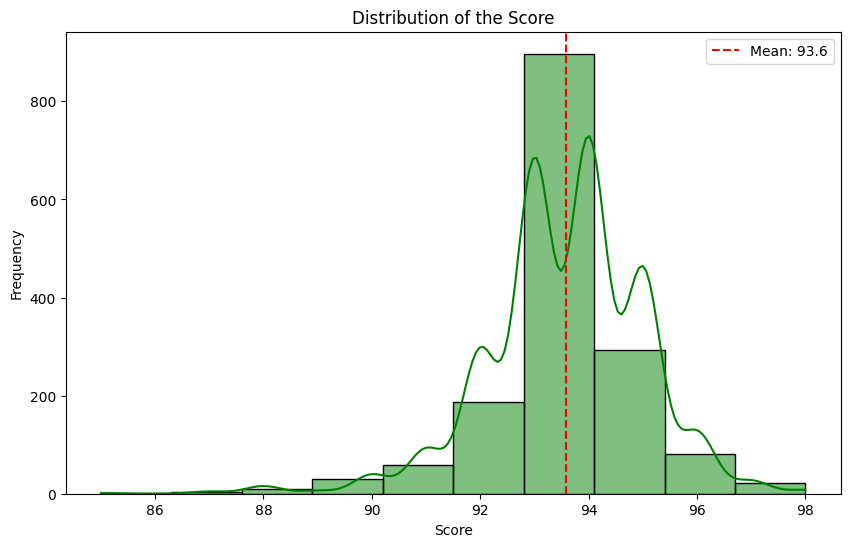

In [12]:
# Distrubion of the score

df['score'].describe()

#plot the distribution of the score
plt.figure(figsize=(10, 6))
sns.histplot(df['score'], bins=10, kde=True, color='green') #kde=True is to show the kernel density estimation
plt.title('Distribution of the Score')
# add the mean line

mean_score = df['score'].mean()
plt.axvline(mean_score, color='red', linestyle='--', label=f'Mean: {mean_score:.1f}')

# to set the legend in the right side and show the mean
plt.legend(loc='upper right')

plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


The unique number of the coffee origin is 66


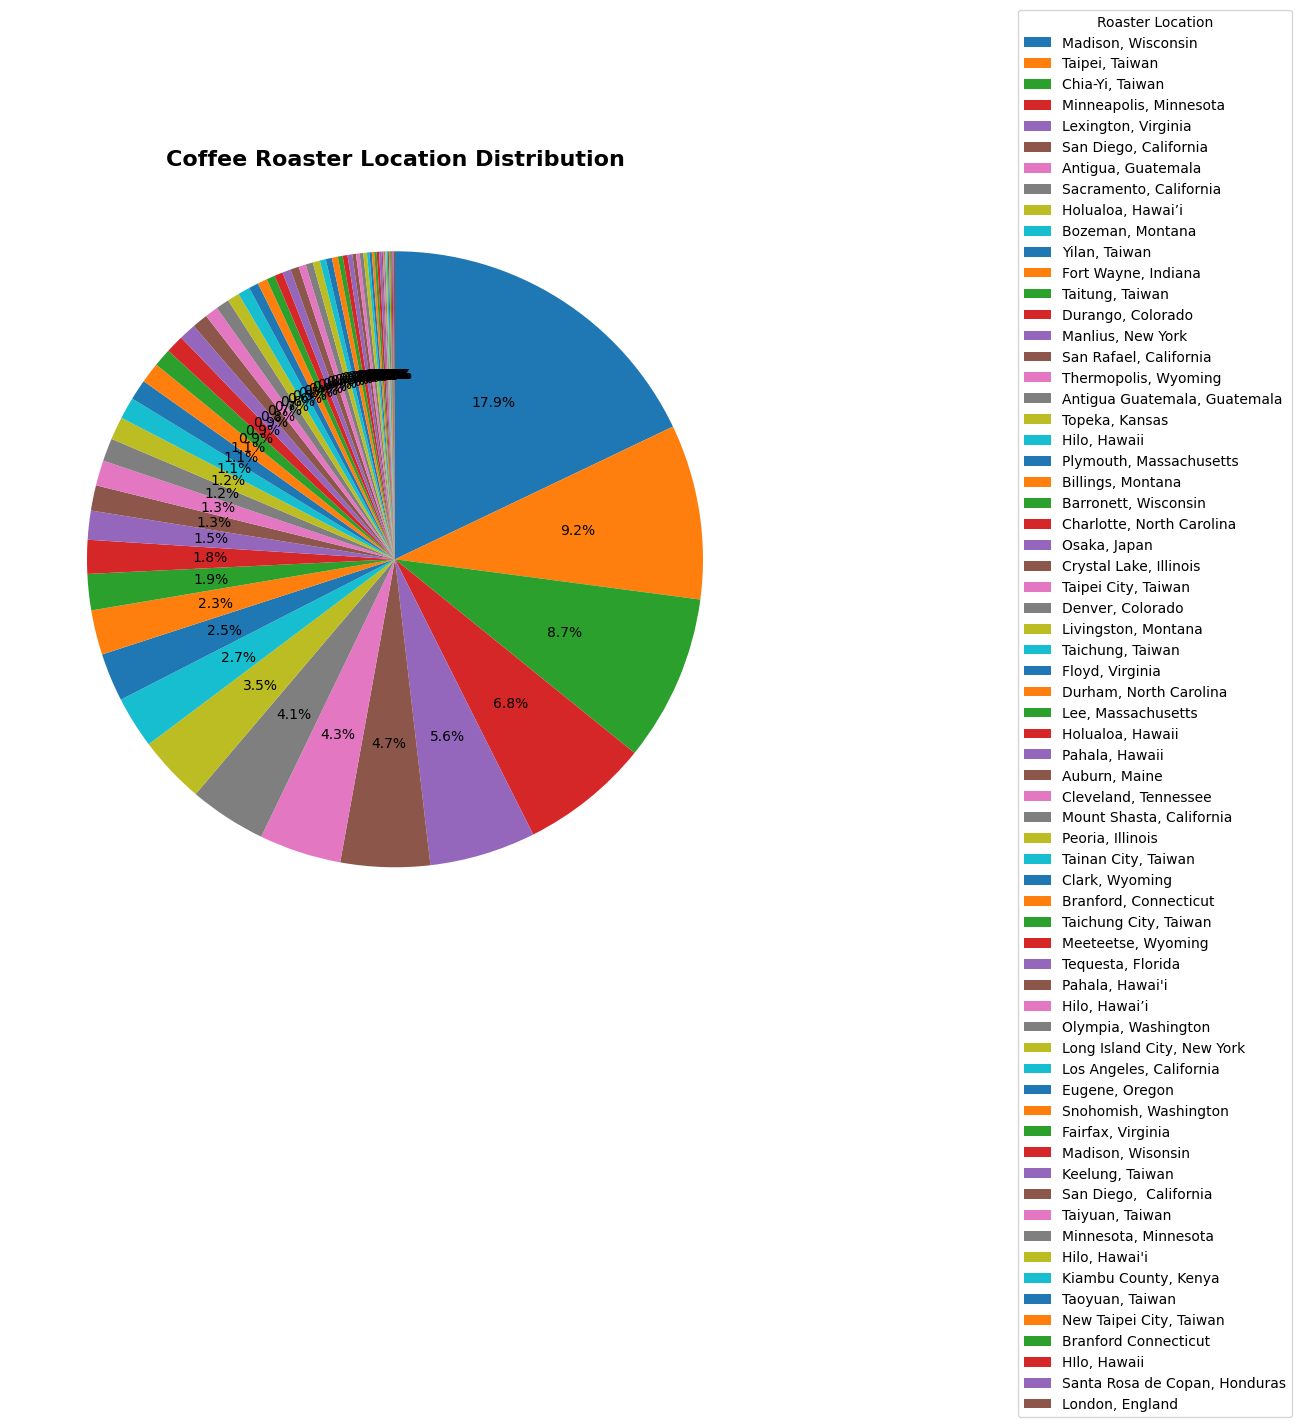

In [13]:
# Coffee Origin Distribution by Review Count
#print the bar plot of the coffee origin distribution by using pie plot
# print the unique number of the coffee origin
print(f'The unique number of the coffee origin is {len(df["Roaster Location"].unique())}')

def plot_coffee_origin_distribution(df):
    """
    plot the bar plot of the coffee origin distribution
    """
    # count the number of coffee origin
    origin_count = df['Roaster Location'].value_counts()
    #return origin_count

    # plot the pie plot
    plt.figure(figsize=(10, 10))
    plt.pie(origin_count.values, #labels=origin_count.index, 
            autopct='%1.1f%%', 
            startangle=90, counterclock=False)
    plt.title('Coffee Roaster Location Distribution', fontsize=16, fontweight='bold')

    # add the legend
    plt.legend(origin_count.index, title="Roaster Location", loc="center left",  bbox_to_anchor=(1.3, 0.3))
    plt.show()

plot_coffee_origin_distribution(df)

/var/folders/ym/cnwhpvr13b10x0g3j5y5kn9w0000gn/T/ipykernel_80527/4176661081.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.violinplot(x='roaster',


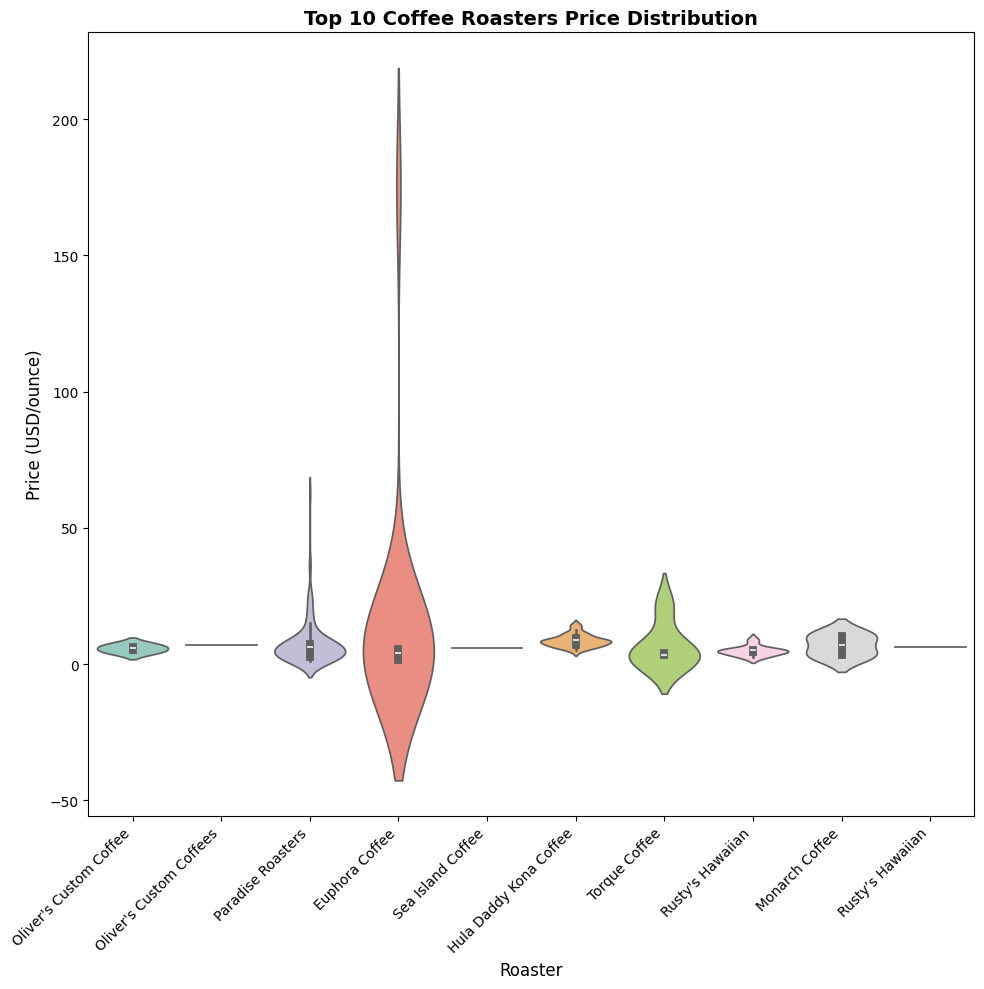


Top 10 Roasters Average Price (USD/ounce):

Euphora Coffee:
Average Price: $14.13
Count: 19
Mean: $14.13
Std: $39.41
Min: $1.05
25th percentile: $1.31
Median: $4.00
75th percentile: $5.60
Max: $175.00

Hula Daddy Kona Coffee:
Average Price: $8.65
Count: 59
Mean: $8.65
Std: $2.28
Min: $4.99
25th percentile: $6.87
Median: $8.74
75th percentile: $9.37
Max: $14.12

Paradise Roasters:
Average Price: $7.51
Count: 131
Mean: $7.51
Std: $8.07
Min: $1.25
25th percentile: $2.50
Median: $6.24
75th percentile: $7.50
Max: $62.50

Oliver's Custom Coffees:
Average Price: $6.88
Count: 1
Mean: $6.88
Std: $nan
Min: $6.88
25th percentile: $6.88
Median: $6.88
75th percentile: $6.88
Max: $6.88

Monarch Coffee:
Average Price: $6.87
Count: 4
Mean: $6.87
Std: $4.04
Min: $3.25
25th percentile: $3.44
Median: $6.87
75th percentile: $10.30
Max: $10.50

Torque Coffee:
Average Price: $6.63
Count: 5
Mean: $6.63
Std: $8.29
Min: $1.13
25th percentile: $3.27
Median: $3.47
75th percentile: $3.94
Max: $21.34

Rusty’s Haw

In [14]:
# Top 10 coffee roaster and their price distribution
plt.figure(figsize=(10, 10))

# get the top 10 roasters data
top_10_roasters = df.groupby('roaster')['Est. Price USD_per_ounce'].mean().nlargest(10)
top_10_data = df[df['roaster'].isin(top_10_roasters.index)]

# use violinplot to show the price distribution
ax= sns.violinplot(x='roaster',
               y='Est. Price USD_per_ounce', 
               data=top_10_data,
               inner='box',  # show the box plot in the violin
               palette='Set3'
)       




# to set the title and label
plt.title('Top 10 Coffee Roasters Price Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Roaster', fontsize=12)
plt.ylabel('Price (USD/ounce)', fontsize=12)

# rotate the x-axis label 45 degrees
plt.xticks(rotation=45, ha='right')  # ha='right‘   

plt.tight_layout()
plt.show()

# to print the top 10 roasters average price
print("\nTop 10 Roasters Average Price (USD/ounce):")
for roaster, price in top_10_roasters.items():
    print(f"\n{roaster}:")
    print(f"Average Price: ${price:.2f}")
    stats = df[df['roaster'] == roaster]['Est. Price USD_per_ounce'].describe()
    print(f"Count: {stats['count']:.0f}")
    print(f"Mean: ${stats['mean']:.2f}")
    print(f"Std: ${stats['std']:.2f}")
    print(f"Min: ${stats['min']:.2f}")
    print(f"25th percentile: ${stats['25%']:.2f}")
    print(f"Median: ${stats['50%']:.2f}")
    print(f"75th percentile: ${stats['75%']:.2f}")
    print(f"Max: ${stats['max']:.2f}")

In [15]:
print("列名：", df.columns.tolist())

列名： ['title', 'roaster', 'score', 'Roaster Location', 'Coffee Origin', 'Roast Level', 'Agtron', 'Est. Price', 'Review Date', 'Aroma', 'Acidity/Structure', 'Body', 'Flavor', 'Aftertaste', 'coffee_name', 'coffee_review_url', 'coffee_brand_url', 'region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific', 'is_blend', 'Est. Price USD', 'Latitude', 'Longitude', 'January_Avg_Temp', 'January_Precipitation', 'July_Avg_Temp', 'July_Precipitation', 'Est. Price USD_per_ounce', 'region']


/var/folders/ym/cnwhpvr13b10x0g3j5y5kn9w0000gn/T/ipykernel_80527/1486374826.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y='score', data=df, palette='Set3')


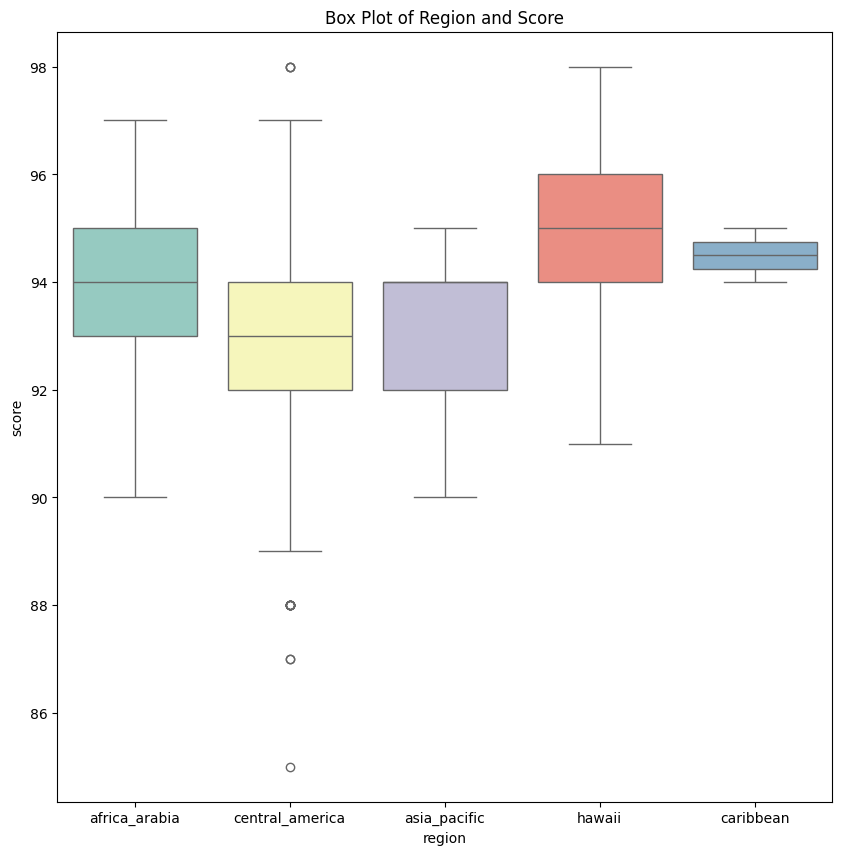

In [16]:
# to show the box plot of the geographcal information 


plt.figure(figsize=(10, 10))
sns.boxplot(x='region', y='score', data=df, palette='Set3')
plt.title('Box Plot of Region and Score')
plt.show()



/var/folders/ym/cnwhpvr13b10x0g3j5y5kn9w0000gn/T/ipykernel_80527/906706476.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='region', y ='Est. Price USD_per_ounce', data=df_copy, palette='Set3')


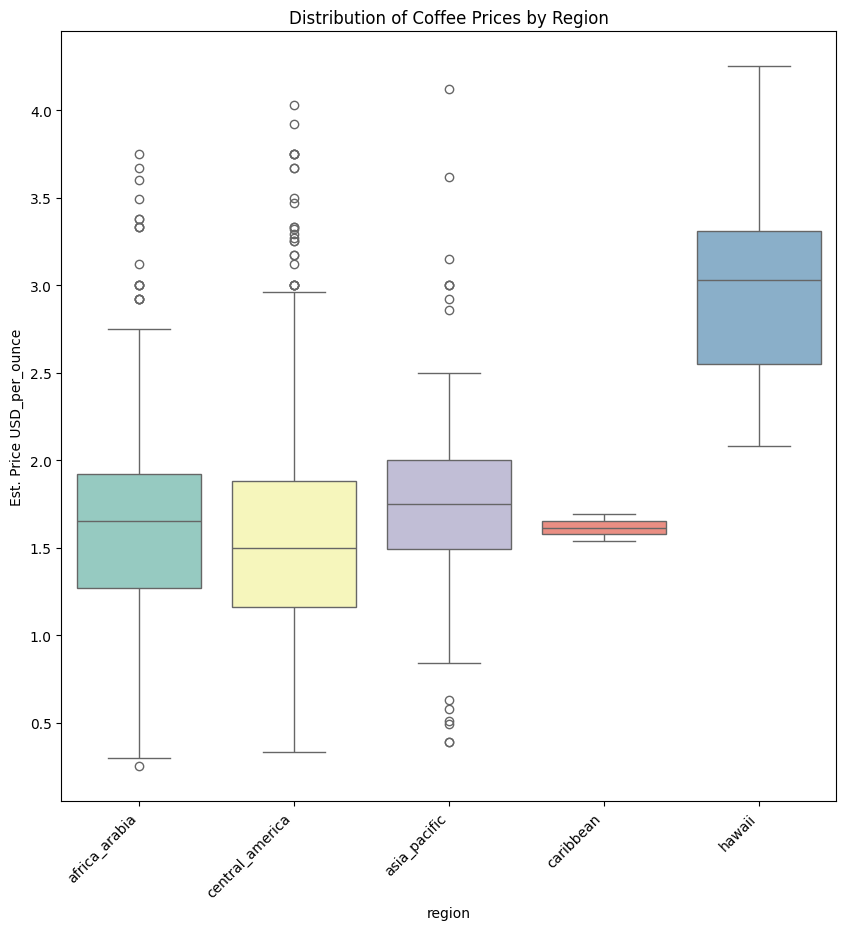

In [17]:
# to show the box plot of the price by region
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df_copy = df.copy()
# remove outliers
# to calculate the outliers 
# define the outliers: 1.5 * IQR
q1 = df_copy['Est. Price USD_per_ounce'].quantile(0.25)
q3 = df_copy['Est. Price USD_per_ounce'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df_copy = df_copy[df_copy['Est. Price USD_per_ounce'] < upper_bound]  

plt.figure(figsize=(10, 10))
sns.boxplot(x='region', y ='Est. Price USD_per_ounce', data=df_copy, palette='Set3')
plt.xticks(rotation=45, ha='right')

#to set the title
plt.title('Distribution of Coffee Prices by Region', fontsize=12)

# to show the plot
plt.show()

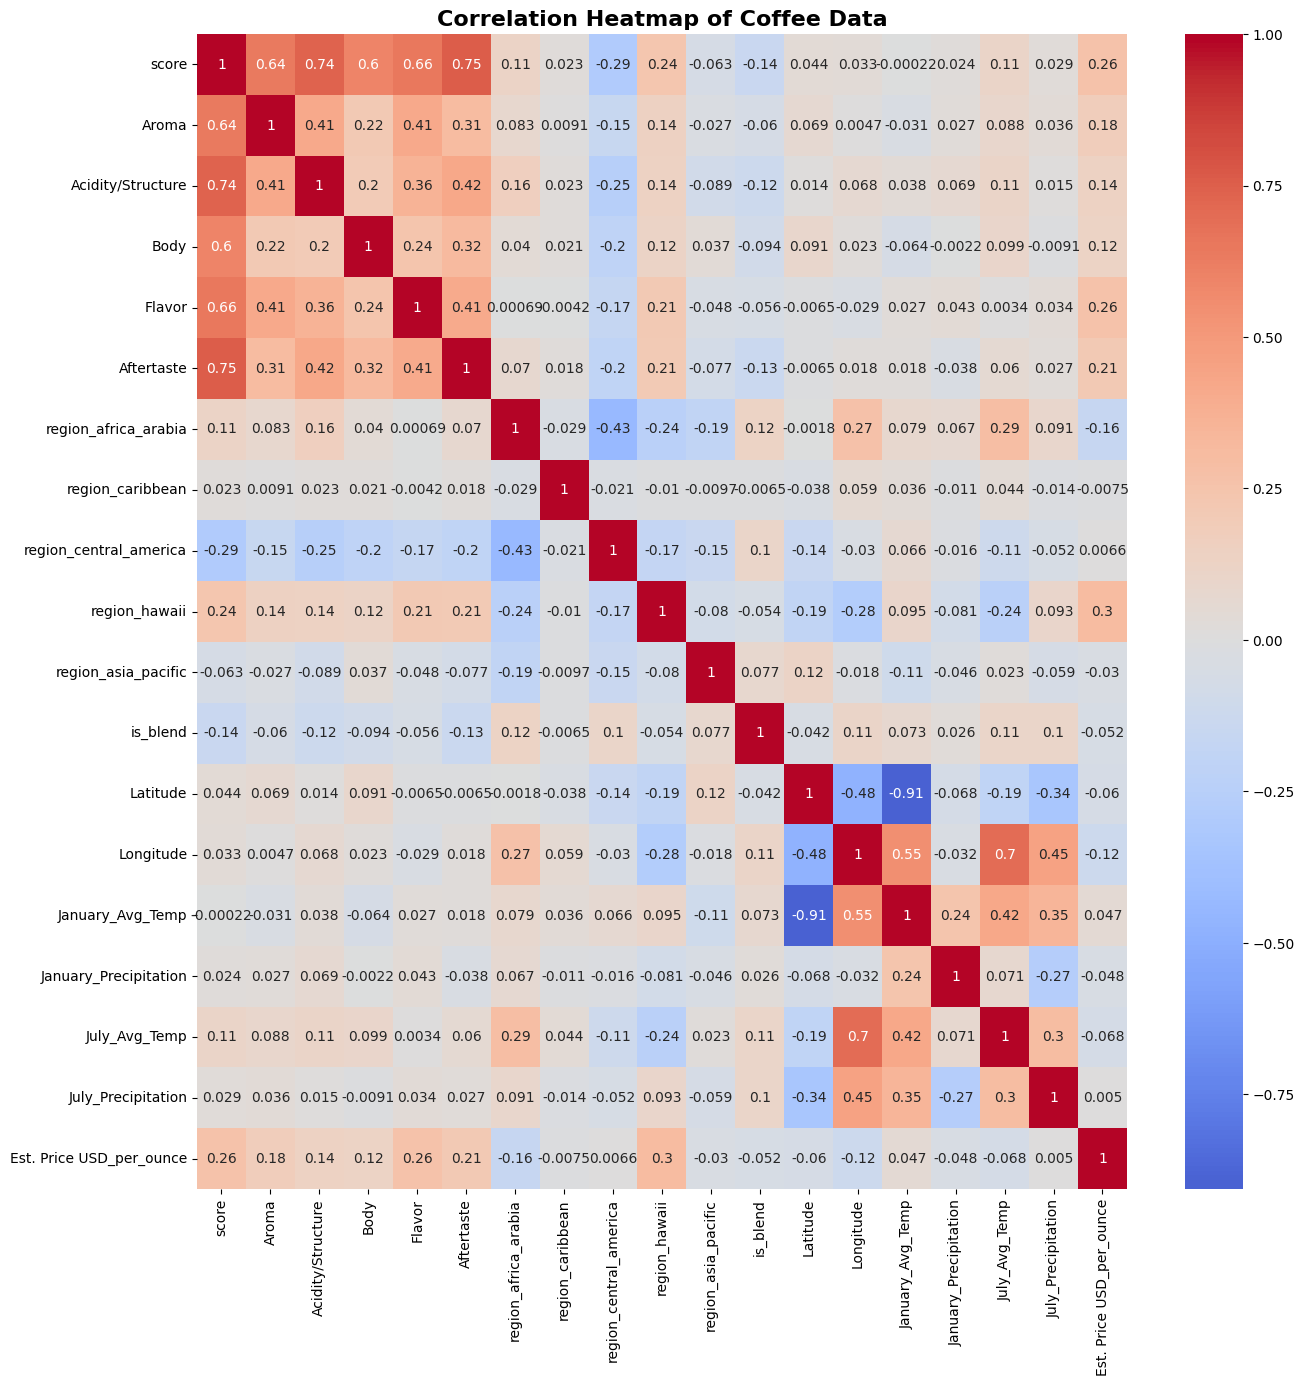

In [18]:
# to show the heatmap of the correlation matrix
# to get numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

# to show the heatmap of the correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Coffee Data', fontsize=16, fontweight='bold')
plt.show()


**Short Summary:** </br>

Corelation Analysis:

- In the correlation matrix, we can see that the score and the Aroma, Acidity/Structure, Body ,Flavor, and Aftertaste are highly correlated. That means those features have highly linear relation. 

- Also, the score and the Est. Price USD_per_ounce are weakly positive correlated.  (correlation coefficient is 0.25)

- Longitude  and July Temperature are positively correlated.  (correlation coefficient is 0.7)
  
- Latitude and January_Avg_Temp are negatively correlated.  (correlation coefficient is -0.91)



In [19]:
# To show the heatmap in the map of the coffee origin location

import folium
from folium.plugins import HeatMap

#to calculate the number of coffee origin in each location
location_counts = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='count')

# to create the map, set the initial center point and zoom level
m = folium.Map(location=[0, 0], zoom_start=2)

# to prepare the heatmap data
heat_data = [[row['Latitude'], row['Longitude'], row['count']] for idx, row in location_counts.iterrows()]

# to add the heatmap layer
HeatMap(heat_data, 
        radius=15,           # the radius of the heatmap
        blur=10,            # the blur of the heatmap
        max_zoom=1,         # the max zoom of the heatmap
        fillOpacity=1.0,      # the fill opacity of the heatmap
        weight=2,             # the weight of the heatmap
        ).add_to(m)

# to add the circle marker of the coffee origin location
for idx, row in location_counts.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color='red',
        fill=True,
        fill_color='red',
        
        popup=f"Latitude: {row['Latitude']}</br> Longitude: {row['Longitude']} </br>  Number of samples: {row['count']}"
    ).add_to(m)

# to save the map as html file
m.save('coffee_origins_density_map.html')


# to display the map
display(m)







#### **Part II: Data Inferential Statistics** <br>
To use the inferential statistics to examine the relationship between the coffee origin and the score, price, and other variables. </br>
- 2.1 Use ANOVA test to examine the relationship between the coffee origin(categorical) and the score(continuous numeric). <br>
- 2.2 Use t-Test to examine the relationship between the is_blend(categorical) and the score(continuous numeric). <br>
- 2.3 Use ANOVA test to examine the relationship between the roaster(categorical) and the price(continuous numeric). <br>
- 2.4 Use ANOVA test to examine the relationship between the roast level(categorical) and the score(continuous numeric) . <br>





In [20]:
#2.1 to use ANOVA test to examine the relationship between the coffee score and the coffee origin
# HO: There is no significant difference in mean coffee ratings among different regions
# HA: There is a significant difference in mean coffee ratings among different regions

# to deal with the region column
region_column = [col for col in df.columns if col.startswith('region_')]
print(region_column)

# to create a new column for the region
df['region'] = None
for col in region_column:
    # to remove the region_ prefix
    region_name = col.replace('region_', '')
    # to map the value 1 to the region name
    df.loc[df[col] == 1, 'region'] = region_name




df['region'].unique()

# to clean the region column
df_clean_region = df[df['region'].notna()].copy()

# to show the data description of the region
print(df_clean_region.groupby('region')['score'].describe())


['region_africa_arabia', 'region_caribbean', 'region_central_america', 'region_hawaii', 'region_asia_pacific']
                 count       mean       std   min    25%   50%    75%   max
region                                                                     
africa_arabia    600.0  93.820000  1.128297  90.0  93.00  94.0  95.00  97.0
asia_pacific     109.0  93.238532  1.216393  90.0  92.00  94.0  94.00  95.0
caribbean          2.0  94.500000  0.707107  94.0  94.25  94.5  94.75  95.0
central_america  412.0  92.876214  1.693473  85.0  92.00  93.0  94.00  98.0
hawaii           125.0  94.760000  1.220788  91.0  94.00  95.0  96.00  98.0


In [21]:
import scipy.stats as stats # to do anova test

f_statistic, p_value = stats.f_oneway(*[group['score'].values 
                                       for name, group in df_clean_region.groupby('region')])


f_statistic, p_value = stats.f_oneway(*[group['score'].values for name, group in df.groupby('region')])
print('ANOVA test result:')
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('The p-value is less than 0.05, so we can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05, so we cannot reject the null hypothesis.')

ANOVA test result:
F-statistic: 57.9224
p-value: 7.251555306523384e-45
The p-value is less than 0.05, so we can reject the null hypothesis.


In [22]:
# 1. to create a cleaned dataframe to make sure the region and score are not null
df_clean = df.dropna(subset=['region', 'score'])

# 2. to execute Tukey's test
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(
    endog=df_clean['score'],    # dependent variable (score)
    groups=df_clean['region'],  # grouping variable (region)
    alpha=0.05                  # significance level
)

# 3. Result
print("\nTukey's HSD test result:")
print(tukey)



Tukey's HSD test result:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
  africa_arabia    asia_pacific  -0.5815 0.0004 -0.9672 -0.1957   True
  africa_arabia       caribbean     0.68 0.9547 -1.9442  3.3042  False
  africa_arabia central_america  -0.9438    0.0 -1.1808 -0.7067   True
  africa_arabia          hawaii     0.94    0.0  0.5757  1.3043   True
   asia_pacific       caribbean   1.2615 0.6891 -1.3822  3.9052  False
   asia_pacific central_america  -0.3623 0.0958 -0.7614  0.0367  False
   asia_pacific          hawaii   1.5215    0.0  1.0359   2.007   True
      caribbean central_america  -1.6238  0.441 -4.2499  1.0024  False
      caribbean          hawaii     0.26 0.9989 -2.3807  2.9007  False
central_america          hawaii   1.8838    0.0  1.5055  2.2621   True
---------------------------------------------------

In [23]:
# 2.2 is_blend vs score  
# HO: There is no significant difference in mean coffee ratings between blend and single origin
# HA: There is a significant difference in mean coffee ratings between blend and single origin

print(df.groupby('is_blend')['score'].describe())

# to group the data by is_blend
blend_score = df[df['is_blend'] == 1]['score']
single_origin_score = df[df['is_blend'] == 0]['score']

# to do the t-test
t_statistic, p_value = stats.ttest_ind(blend_score, single_origin_score, equal_var=False)
print('=================================================================')
print('t-test result:')
print(f't-statistic: {t_statistic:.4f}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('The p-value is less than 0.05, so we can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05, so we cannot reject the null hypothesis.')

           count       mean       std   min   25%   50%   75%   max
is_blend                                                           
0         1529.0  93.614781  1.454391  85.0  93.0  94.0  95.0  98.0
1           51.0  92.431373  1.044125  90.0  92.0  93.0  93.0  94.0
t-test result:
t-statistic: -7.8442
p-value: 1.2936441163578402e-10
The p-value is less than 0.05, so we can reject the null hypothesis.


In [24]:
# 2.3 Coffee roaster vs. Price --> ANOVA test
# HO: There is no significant difference in mean coffee price among different roasters
# HA: There is a significant difference in mean coffee price among different roasters

# to know the data description of the roaster
print("roaster description:")
print(df.groupby('roaster')['Est. Price USD_per_ounce'].describe())

# to do the ANOVA test
f_statistic, p_value = stats.f_oneway(*[group['Est. Price USD_per_ounce'].values for name, group in df.groupby('roaster')])

print('=================================================================')
print('ANOVA test result:')
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('The p-value is less than 0.05, so we can reject the null hypothesis.')
else:
    print('The p-value is greater than 0.05, so we cannot reject the null hypothesis.')



roaster description:
                                count      mean       std   min     25%  \
roaster                                                                   
Bargain Cafe                     30.0  0.486667  0.241423  0.32  0.3700   
Barrington Coffee Roasting        2.0  3.955000  0.883883  3.33  3.6425   
Barrington Coffee Roasting Co.    5.0  2.530000  0.795393  1.62  1.7500   
Bear Lake Coffee                 11.0  1.795455  0.401332  1.50  1.5800   
Bear Lake Coffee Co.              4.0  2.252500  0.515324  1.50  2.1900   
...                               ...       ...       ...   ...     ...   
Torque Coffee                     5.0  6.630000  8.293754  1.13  3.2700   
Utopian Coffee                   37.0  2.477838  3.825740  1.50  1.5800   
Vennel Coffee                     3.0  0.633333  0.155027  0.48  0.5550   
Vista Clara Coffee                2.0  0.720000  0.000000  0.72  0.7200   
Willoughby's Coffee & Tea         6.0  3.661667  2.597063  1.16  1.9250   

   

In [25]:
# 2.4 roaster level vs. score --> ANOVA test
# HO: There is no significant difference in mean coffee ratings among different roast levels
# HA: There is a significant difference in mean coffee ratings among different roast levels

# to know the data description of the roast level
print("roast level description:")
print(df.groupby('Roast Level')['score'].describe())


# to group the data by roaster
roaster_score = df.groupby('Roast Level')['score'].mean()

# to do the ANOVA test
f_statistic, p_value = stats.f_oneway(*[group['score'].values for name, group in df.groupby('Roast Level')])



print('=================================================================')
print('ANOVA test result:')
print(f'F-statistic: {f_statistic:.4f}')
print(f'p-value: {p_value}')

if p_value < 0.05:
    print('The p-value is less than 0.05, so we can reject the null hypothesis.')


roast level description:
              count       mean       std   min   25%   50%   75%   max
Roast Level                                                           
Dark            1.0  94.000000       NaN  94.0  94.0  94.0  94.0  94.0
Light         547.0  93.893967  1.394554  87.0  93.0  94.0  95.0  97.0
Medium         70.0  91.757143  1.731513  87.0  91.0  92.0  93.0  95.0
Medium-Dark     5.0  93.400000  1.949359  90.0  94.0  94.0  94.0  95.0
Medium-Light  957.0  93.528736  1.365466  85.0  93.0  94.0  94.0  98.0
ANOVA test result:
F-statistic: 37.1553
p-value: 9.970231854590581e-30
The p-value is less than 0.05, so we can reject the null hypothesis.


In [26]:
# Tukey's HSD test

tukey = pairwise_tukeyhsd(
    endog=df_clean['score'],    # dependent variable (score)
    groups=df_clean['Roast Level'],  # grouping variable (region)
    alpha=0.05                  # significance level
)
print(tukey)


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2    meandiff p-adj   lower   upper  reject
---------------------------------------------------------------
       Dark        Light  -0.1955 0.9999 -4.0912  3.7002  False
       Dark       Medium  -2.2075 0.5395 -6.1349  1.7198  False
       Dark  Medium-Dark     -1.0 0.9706 -5.3501  3.3501  False
       Dark Medium-Light  -0.4539 0.9978 -4.3472  3.4394  False
      Light       Medium  -2.0121    0.0 -2.5809 -1.4432   True
      Light  Medium-Dark  -0.8045 0.7938 -2.7597  1.1506  False
      Light Medium-Light  -0.2584 0.0265 -0.4973 -0.0195   True
     Medium  Medium-Dark   1.2075 0.4751 -0.8099   3.225  False
     Medium Medium-Light   1.7537    0.0  1.2016  2.3058   True
Medium-Dark Medium-Light   0.5461 0.9406 -1.4042  2.4965  False
---------------------------------------------------------------


**Short summary:**

2.1 Use ANOVA test to examine the relationship between the coffee origin(categorical) and the score(continuous numeric).<br>
  -> p-value <0.05, which means the analysis showed significant differences in coffee scores across different origins, indicating that the geographical source of coffee beans significantly affects quality ratings. </br>

  After post hoc test (tukey HSD), it shows that :</br>
  1. Central America and Asia Pacific consistently show higher coffee scores</br>
  2. Hawaii generally receives lower scores</br>
  3. Caribbean shows moderate performance with no significant differences from most regions </br>
   
</br>


2.2 Use t-Test to examine the relationship between the is_blend(categorical) and the score(continuous numeric). <br>
  -> p-value <0.05, which means the analysis showed significant differences in coffee scores across is_blend or not, indicating if blending coffee beans is significantly affects quality ratings.
</br>
2.3 Use ANOVA test to examine the relationship between the roaster(categorical) and the price(continuous numeric). <br>
  -> p-value <0.05, which means the analysis showed significant differences in coffee price across different roasters.

</br> 
2.4 Use ANOVA test to examine the relationship between the roast level(categorical) and the score(continuous numeric) . <br>
  ->p-value 0.05,  which means the analysis showed significant differences in coffee scores across different roast level. </br>
  
  After post hoc test (tukey HSD), it shows that : </br>
  1. Medium roast coffees demonstrated the highest average scores </br>
  2. Dark roast coffees showed significantly lower scores compared to medium roasts </br>
  3. Light to medium-light roasts exhibited moderate scores   </br>




#### **Part III: Data Linear Regression Analysis** <br>
To use the linear regression to examine the relationship between the price and the score. </br>
- Use the linear regression to examine the relationship between the price and the score. <br>
- Use the linear regression to examine the relationship between the review time and the score. <br>

Text(43.25, 0.5, 'score')

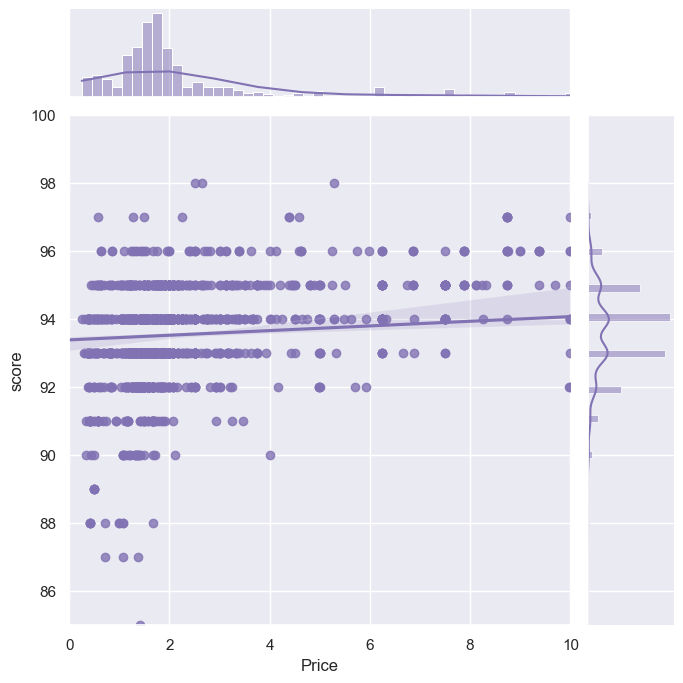

In [27]:
# Linear Regression Analysis
# To use the linear regression to examine the relationship between the price and the score.

# 1.1 price vs. score --> Linear Regression Analysis
# Linear regression with marginal distributions
sns.set_theme(style="darkgrid")
# to create the scatter plot
g = sns.jointplot(x='Est. Price USD_per_ounce', y='score', data=df,
                kind="reg", truncate=False,
                xlim=(0, 10), # set the x-axis limit
                ylim=(85, 100), # set the y-axis limit
                color="m", height=7)


plt.xlabel('Price', fontsize=12)
plt.ylabel('score', fontsize=12)

**Short summary:**

From above joint plot, that is an interesting fact which is the relation between rating score and price shows a weak positive correlation. Thus, even a low-priced coffee may get a higher rating rather than high-priced coffee.

/var/folders/ym/cnwhpvr13b10x0g3j5y5kn9w0000gn/T/ipykernel_80527/2544963439.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Review Date'] = pd.to_datetime(df['Review Date'])
/var/folders/ym/cnwhpvr13b10x0g3j5y5kn9w0000gn/T/ipykernel_80527/2544963439.py:44: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


The unique review year is [2025 2024 2023 2022 2021 2020]


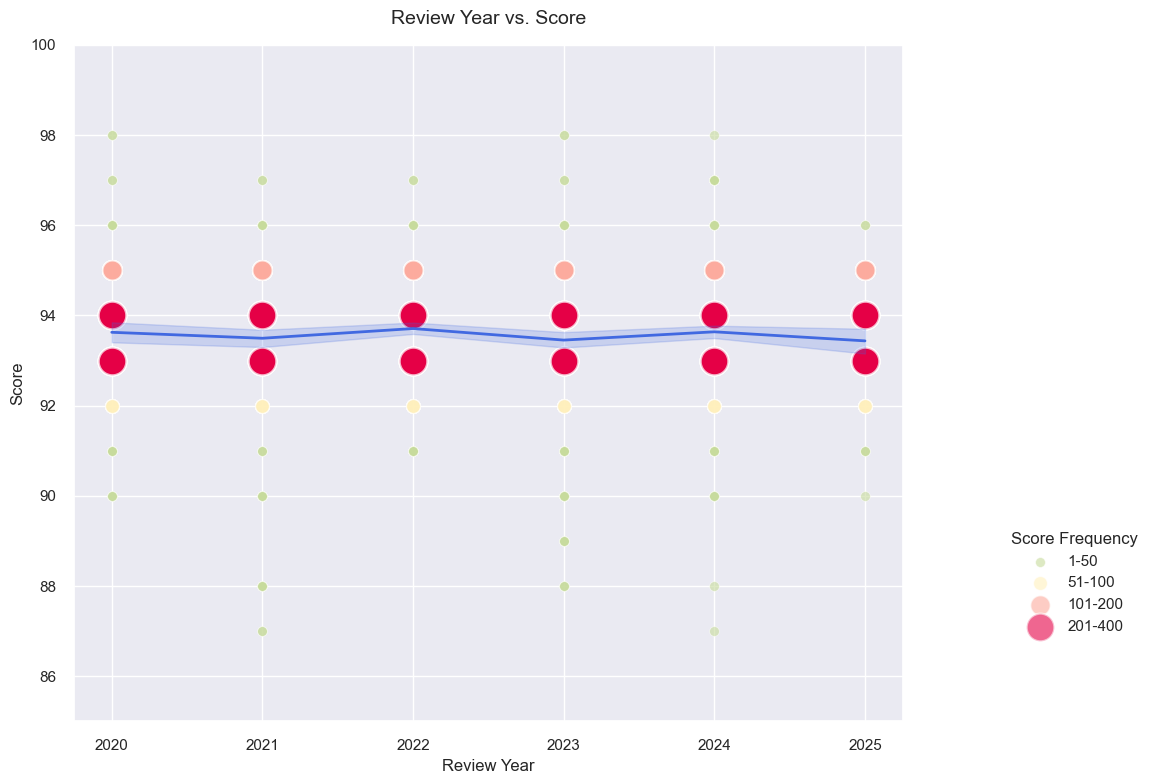

In [28]:
# review time and score
# To use the linear regression to examine the relationship between the review year and the score.

# group the data by review time
df['Review Date'] = pd.to_datetime(df['Review Date'])
df['Review_Year'] = df['Review Date'].dt.year
print(f'The unique review year is {df["Review_Year"].unique()}')

#  to calculate the score count
score_counts = df.groupby('score').size()
df['Score_Count'] = df['score'].map(score_counts)

# to calculate the min and max of the score count
min_count = df['Score_Count'].min()
max_count = df['Score_Count'].max()
bins = [min_count, 
        min_count + (max_count-min_count)/4, 
        min_count + 2*(max_count-min_count)/4,
        min_count + 3*(max_count-min_count)/4,
        max_count]

# to use pd.cut to group the data
df['Size_Category'] = pd.cut(df['Score_Count'], 
                            bins=bins,
                            labels=['Very Small', 'Small', 'Medium', 'Large'])

# to create the size and color mapping dictionary
size_mapping = {
    'Very Small': 50,
    'Small': 100,
    'Medium': 200,
    'Large': 400
}

# to define the color palette
color_palette = {
    'Very Small': '#C7DB9C',  
    'Small': '#FFF0BD',      
    'Medium': '#FDAB9E',      
    'Large': '#E50046'       
}

# to set the graph style
plt.style.use('seaborn')
sns.set_theme(style="darkgrid")
# to create the subplot - scatter plot
fig, ax = plt.subplots(figsize=(12, 8))

# to plot the scatter plot for each category
for category in ['Very Small', 'Small', 'Medium', 'Large']:
    mask = df['Size_Category'] == category
    sns.scatterplot(data=df[mask], 
                    x='Review_Year', 
                    y='score',
                    s=size_mapping[category],  # to set the size of the point
                    color=color_palette[category],  # to set the color of the point
                    alpha=0.6,  # to set the transparency of the point
                    label=category,
                    ax=ax)

# to add the trend line
sns.lineplot(data=df, 
            x='Review_Year', 
            y='score',
            color='#4169E1',  # to set the color of the trend line
            linewidth=2,
            label='Trend',
            ax=ax)

# to set the graph title and label
plt.title('Review Year vs. Score', fontsize=14, pad=15)
plt.xlabel('Review Year', fontsize=12)
plt.ylabel('Score', fontsize=12)

# to set the y-axis range
plt.ylim(85, 100)

# legend
plt.legend(title='Score Frequency', loc='upper right', labels = ['1-50', '51-100', '101-200', '201-400'], bbox_to_anchor=(1.3, 0.3))

# adjust the layout
plt.tight_layout()

plt.show()


**Short summary:**

The result shows that the rating system remains stable from 2020 to 2025 because the trend line demonstrates a quiet flat. There is no obvious rating of inflation or devaluation. It could be seen as a stable rating system.